# Module 02: A Box Model Carbon Assignment
## Due: 9/21/2021 @ 11:59pm
## Name: Sarah Jones
### 1. Introduction

In the accompanying notebook [mod02-CarbonModel1.ipynb](./mod02-CarbonModel1.ipynb) and in class we developed a relatively simple model of global carbon balance that assumed that tracked carbon in the atmosphere and biosphere. The system of equations we developed to describe this system are shown below,

$$
\begin{align*}
\frac{dM_1}{dt} &= F_{21} - F_{12}\\
&= k_{21}M_2 - k_{12}M_1
\end{align*}
$$

and,

$$
\begin{align*}
\frac{dM_2}{dt} &= F_{12} - F_{21}\\
&= k_{12}M_1 - k_{21}M_2
\end{align*}
$$

where $M_1$ is the mass of carbon in the atmosphere (GtC), $M_2$ is the mass of carbon in the biosphere (GtC), $F_{12}$ is the flux of carbon from the atmosphere to the biosphere due to photosynthesis (GtC/yr), and $F_{21}$ is the flux of carbon from the biosphere to the atmosphere due to decay and respiration (GtC/yr).

In that notebook we develop a numerical model to describe that system, run it for given initial conditions and with no external inputs of carbon (we call this an "unforced" scenario) and compare it to the analytical solution. We observed that as the time step increased, we departed further from the analytical solution. 

In this assignment you will take your model one step more realistic by ensuring that the photosynthetic flux depends on both the amount of carbon in the atmosphere and in the biosphere. Then you will examine the impact of anthropogenic emissions from 1751-2008 on the biosphere and atmosphere, and how alternative future scenarios of emissions mitigation affect your system. 

The code cell below contains a couple of new commands and some file names that you will need in this assignment. You will need all of these commands, _but not necessarily

## 2. Assignment Tasks

For all plots, label all axes and provide units.



### __Problem A: Modify and rerun the model__

1. Modify the model so that the photosynthesis flux includes the mass of carbon in the land (i.e., $M_2$). Use the following parameters:

  * $M_1^0$ = 1100.0 
  * $M_2^0$ = 300.0 
  * $k_{12}$ = 0.0003 
  * $k_{21}$ = 0.1  

2. Repeat the "unforced" (i.e., no anthropogenic emissions) simulation above, but run the model for `t = 100` years with a daily time step (i.e., `dt = 1/365`)
3. Use the `print()` command to print out the value of $M_1$ and $M_2$ at the end of the simulation

#### Establish initial conditions

In [1]:
import numpy as np
import matplotlib.pyplot as plt

M1i = 1100.0   # Initial mass of carbon in atmosphere (gigatons of carbon, GtC)
M2i = 300.0    # Initial mass of carbon in "land" or "biosphere" (gigatons of carbon, GtC)

k12 = 0.0003   # Constant related to carbon flux (year^-1)
k21 = 0.1     # Constant related to carbon flux (year^-1)

#### Modify model to have photosynthesis flux include mass of carbon in 'biosphere' and re-run the model for t=100 with daily time step

In [2]:
ti = 0.0    # Initial time (years)
tf = 100    # Final time (years)
dt = 1/365  # time step (days)

t = np.arange(ti,tf+dt,dt)   # creates array from initial to final time + 1 with increment of 1 day
Nt = t.size  # calls size of t

M1 = np.zeros((Nt,))   # initializes array of size Nt filled with zeros
M2 = np.zeros((Nt,))   # initializes array of size Nt filled with zeros

for i in np.arange(Nt):
    if (i==0):

        M1[i] = M1i   # Sets the first element in M1 equal to the initial mass of carbon in the atmosphere
        M2[i] = M2i   # Sets the first element in M2 equal to the initial mass of carbon in the "land" or "biosphere"
        
    else:
        dM1dt = k21*M2[i-1] - k12*M1[i-1]*M2[i-1]   # Calculates dM1dt, w/photosynthesis flux including mass of 'biosphere'
        dM2dt = k12*M1[i-1]*M2[i-1] - k21*M2[i-1]   # Calculates dM2dt, w/photosynthesis flux including mass of 'biosphere'
        
        # Numerical Solutions
        M1[i] = M1[i-1] + dM1dt*dt   # Calculates the carbon mass in the atmosphere for time greater than 0 (loops to get data for each time step)
        M2[i] = M2[i-1] + dM2dt*dt   # Calculates the carbon mass in the "biosphere" for time greater than 0 (loops to get data for each time step)

#### Print value of carbon mass at final time

In [3]:
print('M1 Final = '+str(M1[i])+' GtC\n')
print('M2 Final = '+str(M2[i])+' GtC')

M1 Final = 333.3333333333658 GtC

M2 Final = 1066.6666666665792 GtC


### __Problem B: Examine impacts of human emissions__

1. Load the anthropogenic emissions data for 1751-2008 (see numpy `np.loadtxt()` command usage [here](https://numpy.org/doc/stable/reference/generated/numpy.loadtxt.html)). Note that the data is in a comma separated variable file (named `AnthropogenicEmissions.1751_2008.csv`) with one header row.
2. Plot the anthropogenic emissions data  
3. Starting from the initial conditions ($M_1^0$ and $M_2^0$) corresponding to the final conditions noted in part __A(3)__ above, simulate the response of the carbon system to the anthropogenic emissions from 1751 to 2008 by adding an appropriate source term in the system of equations. Create the following plots:

  * Mass of C in the atmosphere versus time 
  * Mass of C in the land versus time 
  * The change in mass of C in the atmosphere vs time 
  * The change in mass of C in the biosphere vs time 
    
4. Use the `print()` command to print out the value of $M_1$ and $M_2$ at the end of the simulation in 2008.

#### 1. Pull and organize historical anthropogenic emission data

In [4]:
historical_emissions_file = 'AnthropogenicEmissions.1751_2008.csv'
data = np.loadtxt(historical_emissions_file, delimiter=',', skiprows=1)
# Read this documentation to understand what this command does: 
#    https://numpy.org/doc/stable/reference/generated/numpy.loadtxt.html
year = data[:,0]   # calls year data from AnthropogenicEmissions.1751_2008 csv file
cflux = data[:,1]  # calls emission data from AnthropogenicEmissions.1751_2008 csv file

#### 2. Plot historical anthropogenic emission data

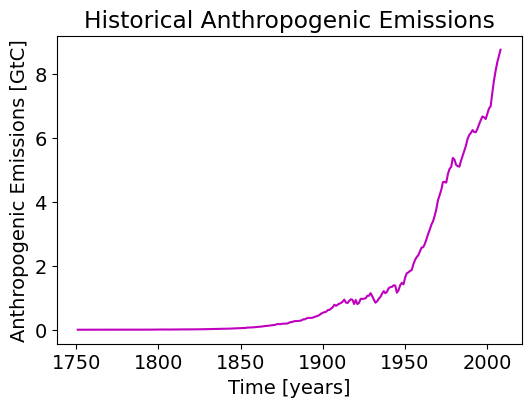

In [5]:
plt.figure(figsize=(6,4))
plt.rcParams.update({'font.size': 14})
plt.title('Historical Anthropogenic Emissions')
plt.plot(year,cflux,'m-')
plt.xlabel('Time [years]')
plt.ylabel('Anthropogenic Emissions [GtC]')

plt.show()

#### 3. Add forcing term to include antrhopogenic emissions in simulation and plot results

In [6]:
# Similar process as in problem A
# variables renamed to include _f to represent variables set for forced equation
    
ti_f = 1751    # Initial time (years)
tf_f = 2008   # Final time (years)
dt_f = 1/365  # time step (days)
t_f = np.arange(ti_f,tf_f+dt_f,dt_f)   # creates array from initial to final time + 1 with increment of 1 day
Nt_f = (t_f.size)+1   # calls size of t_f + 1, +1 is needed for diff calculations

cflux_t_f = np.interp(t_f, year, cflux)   # interpolates anthropogenic emission data for t_f points 
Fa = cflux_t_f   # Sets forcing term Fa equal to interpolated emission data

M1_f = np.zeros((Nt_f,))   # initializes array of size Nt_f filled with zeros
M2_f = np.zeros((Nt_f,))   # initializes array of size Nt_f filled with zeros

for i in np.arange(Nt_f):
    if (i==0):

        M1_f[i] = M1i   # Sets the first element in M1 equal to the initial mass of carbon in the atmosphere
        M2_f[i] = M2i   # Sets the first element in M2 equal to the initial mass of carbon in the "land"

    else:
        dM1dt_f = k21*M2_f[i-1] - k12*M1_f[i-1]*M2_f[i-1]+Fa[i-1]   # Calculates dM1dt forced
        dM2dt_f = k12*M1_f[i-1]*M2_f[i-1] - k21*M2_f[i-1]   # Calculates dM2dt forced
        
        # Numerical Solutions
        M1_f[i] = M1_f[i-1] + dM1dt_f*dt_f   # Calculates the carbon mass in the atmosphere for time greater than 0 (loops to get data for each time step)
        M2_f[i] = M2_f[i-1] + dM2dt_f*dt_f   # Calculates the carbon mass in the "land" for time

# Calculate differences in carbon for plots 3 and 4
dM1_f = np.diff(M1_f)  # Calculates difference between elements in M1_f array, i.e. M1[i+1]-M1[i], needs t_F.size +1 points to work
dM2_f = np.diff(M2_f)  # Calculates difference between elements in M2_f array, i.e. M2[i+1]-M2[i], needs t_f.size +1 points to work

# Reset size of M1_f and M2_f so they plot correctly against t_f in plot 1 and 2
M1_f = M1_f[0:i]   # Re-assigns M1_f to only include indices from 0 to size of t_f, aka i-1
                     # since the for loop has ended (i will equal the i value at the last run of the for loop)
                     # assuming calling elements 0:i of M1_f works because python does not include i (like in the np.arange command)
M2_f = M2_f[0:i]   # Re-assigns M2_f to only include indices of the array from 0 to size of t_f

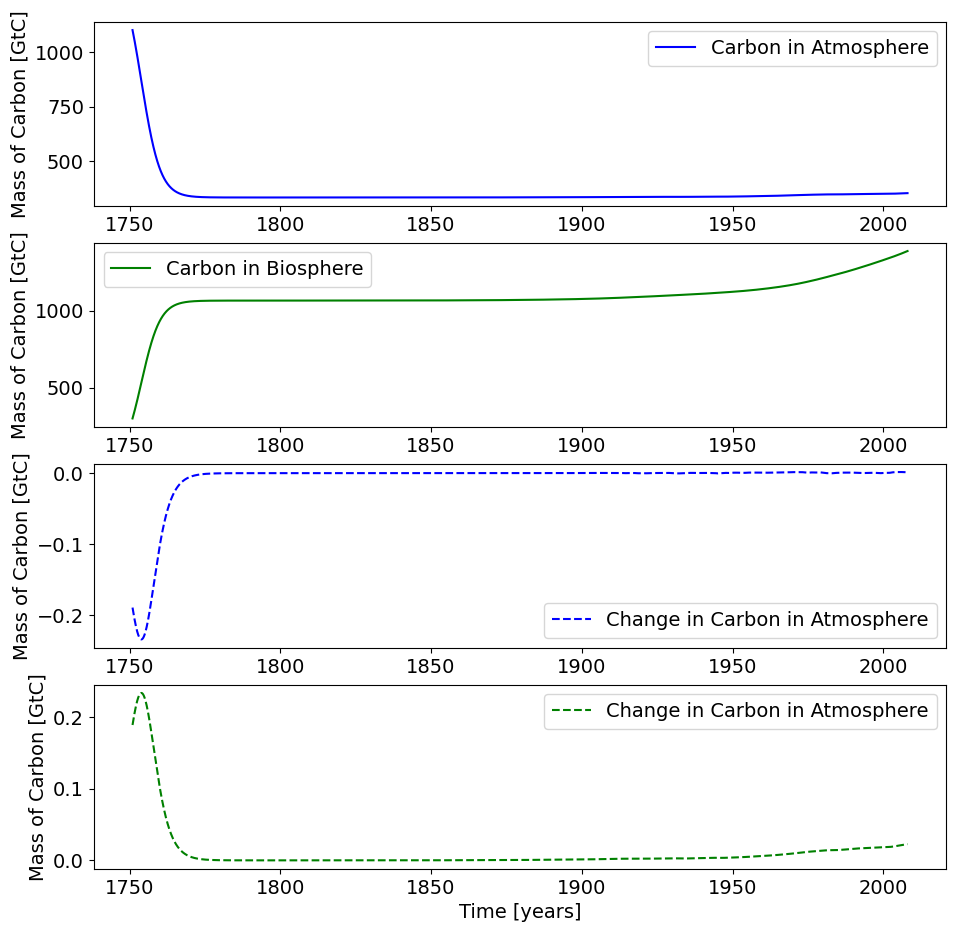

In [7]:
# Plot results
plt.figure(figsize = (11,11))
plt.rcParams.update({'font.size': 14})

plt.subplot(4,1,1)
plt.plot(t_f,M1_f, 'b-', label='Carbon in Atmosphere')
plt.ylabel('Mass of Carbon [GtC]')
plt.legend()

plt.subplot(4,1,2)
plt.plot(t_f,M2_f, 'g-', label='Carbon in Biosphere')
plt.ylabel('Mass of Carbon [GtC]')
plt.legend()

plt.subplot(4,1,3)
plt.plot(t_f,dM1_f, 'b--', label='Change in Carbon in Atmosphere')
plt.ylabel('Mass of Carbon [GtC]')
plt.legend()

plt.subplot(4,1,4)
plt.plot(t_f,dM2_f, 'g--', label='Change in Carbon in Atmosphere')
plt.xlabel('Time [years]')
plt.ylabel('Mass of Carbon [GtC]')
plt.legend()

plt.show()

#### 4. Print mass of carbon at final time for system including anthropogenic emissions

In [8]:
print('M1 Final = '+str(M1_f[i-1])+' GtC\n')   # index of M1_f for printing has to be i-1 since we ran the for loop for the size of our time data +1
print('M2 Final = '+str(M2_f[i-1])+' GtC')     # index of M2_f for printing has to be i-1 since we ran the for loop for the size of our time data +1

M1 Final = 353.2282478882785 GtC

M2 Final = 1389.1417712620646 GtC


### __Problem C: Examine the effects of mitigation__

1. Load the alternative emission scenarios contained in the file `.csv`, which represent three pathways to net zero emissions: (a) net zero emissions by the year 2030 (column 2), (c) net zero emissions by 2050 (column 3), and zero emissions growth (i.e., constant emissions) starting in 2008 (column 4).
2. Starting from the initial conditions ($M_1^0$ and $M_2^0$) corresponding to the final conditions noted in part __B(4)__ above, run the model three times, one for each scenario. Create the following plots: 

  * Mass of C in the atmosphere versus time (all three scenarios on one plot)
  * Mass of C in the land versus time (all three scenarios on one plot)
  * The change in mass of C in the atmosphere vs time 
  * The change in mass of C in the biosphere vs time 

In [9]:
future_emissions_file = 'EmissionsMitigationScenarios.csv'

data = np.loadtxt()
year = data[:,0]
cflux_nz2030 = data[:,1]
cflux_nz2050 = data[:,2]
cflux_zeg = data[:,3]

TypeError: loadtxt() missing 1 required positional argument: 'fname'